# Data Science Capstone Two Project: Ecommerce Fraud Data

### Project Description

* Checking for similarities/correlations between potentially fradulent customers


### Data Source

* The Datasets consists of 2 csv files both containing information on ecommerce transactions made by customers.
* To detect Fraud using this data one needs to perform proper EDA and feature engineering to obtain good results. 
* Data Retrieved November 04, 2011 from (https://www.kaggle.com/aryanrastogi7767/ecommerce-fraud-data)

In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the Data 

transactions_df = pd.read_csv('/Users/Maryam/Desktop/Data Science Intro/CAPS_PROJECT_2/Data/cust_transaction_details (1).csv')

customers_df = pd.read_csv('/Users/Maryam/Desktop/Data Science Intro/CAPS_PROJECT_2/Data/Customer_DF (1).csv')

In [3]:
#Get the shape of the transaction data
transactions_df.shape

(623, 11)

In [4]:
# Get the information on the data

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [5]:
# Describe the dataframe

transactions_df.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [6]:
# View the form of the transaction data

transactions_df.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [7]:
#Get the shape of the customer data

customers_df.shape

(168, 10)

In [8]:
# Get the information on the data

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [9]:
# View the form of the customer dats

customers_df.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


## Part I. Data Wrangling

### Data Cleaning

In [10]:
# Check for duplicates in transactions 

transactions_df_duplicates = transactions_df.duplicated().sum()

transactions_df_duplicates

0

In [11]:
# Check for missing values in transactions 

transactions_df_na = transactions_df.isna().sum()

transactions_df_na

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In [12]:
# Check for duplicates in customers

customers_df_duplicates = customers_df.duplicated().sum()

customers_df_duplicates

0

In [13]:
# Check for missing values in customers 

customers_df_na = customers_df.isna().any()

customers_df_na

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

In [14]:
#Check for unique customers in transactions df

unique_trans_emails = transactions_df['customerEmail'].nunique()

unique_trans_emails

136

In [15]:
# Check for unique emails in customers data set

unique_cust_emails = customers_df['customerEmail'].nunique()

unique_cust_emails

161

#### Changing the column names to prepare for our join of the two datasets 


In [16]:
# Used the append() method to join Customers to transactions database. 
df = pd.merge(customers_df, transactions_df, on="customerEmail", how="outer")

# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.

df

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0.0,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,1.0,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,2.0,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,3.0,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,4.0,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,618.0,7yilsi1o,1bubxa,7yen1m1q8,0.0,card,VISA 13 digit,25.0,1.0,fulfilled
840,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,619.0,c82k5bcv,1bubxa,7yen1m1q8,0.0,card,VISA 13 digit,25.0,0.0,fulfilled
841,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,620.0,wmh52bns,1bubxa,3zmkegkb8,0.0,paypal,JCB 15 digit,25.0,1.0,fulfilled
842,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,621.0,xdw33hfp,p0gdbf,3zmkegkb8,0.0,paypal,JCB 15 digit,19.0,0.0,fulfilled


In [17]:
# Check for duplicates in joint database
df_duplicates = df.duplicated().sum()

df_duplicates

0

In [18]:
# Check for missing values in joint database
missing_values = df.customerEmail.isna().sum()

missing_values

0

In [19]:
# Separate states for fraud cases

df["State"] = df["customerBillingAddress"].str.split(",", expand=True)[1]

df["State"] = df['State'].str.replace('\d+', '')

df["State"] = df['State'].str.replace(r"[^a-zA-Z0-9]", '')

df


<ipython-input-19-1efbb6f64220>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["State"] = df['State'].str.replace('\d+', '')
<ipython-input-19-1efbb6f64220>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["State"] = df['State'].str.replace(r"[^a-zA-Z0-9]", '')


,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,State
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending,CA
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled,CA
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled,NM
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled,NM
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,...,7yilsi1o,1bubxa,7yen1m1q8,0.0,card,VISA 13 digit,25.0,1.0,fulfilled,KS
840,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,...,c82k5bcv,1bubxa,7yen1m1q8,0.0,card,VISA 13 digit,25.0,0.0,fulfilled,KS
841,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,...,wmh52bns,1bubxa,3zmkegkb8,0.0,paypal,JCB 15 digit,25.0,1.0,fulfilled,KS
842,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False,...,xdw33hfp,p0gdbf,3zmkegkb8,0.0,paypal,JCB 15 digit,19.0,0.0,fulfilled,KS


## Part II. EDA


In [20]:
# Used the groupby() method to check fraud probaility in df.
# Called describe() method to gather key statistics on the df. 

df.groupby(by='Fraud').describe()


Unnamed: 0_x                                                        \
             count       mean        std  min   25%   50%     75%    max   
Fraud                                                                      
False        386.0  80.487047  50.362335  0.0  33.0  73.5  130.75  167.0   
True         458.0  89.777293  50.186595  1.0  45.0  84.0  133.00  166.0   

      No_Transactions            ... transactionAmount         \
                count      mean  ...               75%    max   
Fraud                            ...                            
False           386.0  5.119171  ...              39.0   50.0   
True            458.0  4.975983  ...              50.0  353.0   

      transactionFailed                                               
                  count      mean       std  min  25%  50%  75%  max  
Fraud                                                                 
False             366.0  0.295082  0.456704  0.0  0.0  0.0  1.0  1.0  
True              453.0  0.225166  0.418153  0.0  0.0  0.0  0.0  1.0  

[2 rows x 64 columns]

In [21]:
fraud = df.groupby(by='Fraud').sum()

print(fraud['No_Orders'])


Fraud
False    1312
True     1807
Name: No_Orders, dtype: int64


In [22]:
#Sort fraud cases by State

fraud_by_State = df.State[df["Fraud"] == True]

fraud_by_State_values = fraud_by_State.value_counts()

fraud_by_State.describe()


count     453
unique     39
top        IN
freq       56
Name: State, dtype: object

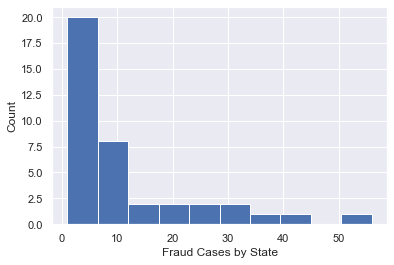

In [23]:
#Fraud by State histogram

sns.set()

_ = plt.hist(fraud_by_State_values)
_ = plt.xlabel('Fraud Cases by State')
_ = plt.ylabel('Count')

plt.show()


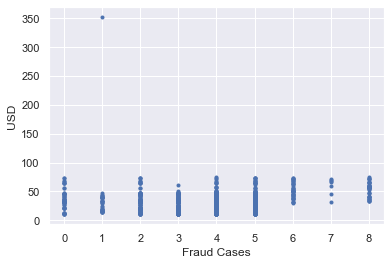

In [24]:
#Review overall distribtion using a scatter plot

_ = plt.plot( df['No_Orders'],df['transactionAmount'],
marker='.', linestyle='none')

_ = plt.xlabel('Fraud Cases')

_ = plt.ylabel('USD')

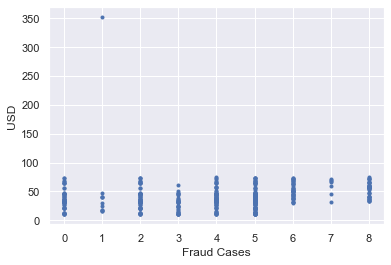

In [25]:
#Review Fraud amounts per case distribtion using a scatter plot

df_fraud = df[df['Fraud'] == True]

_ = plt.plot(df_fraud['No_Orders'], df_fraud['transactionAmount'], marker='.', linestyle='none')

_ = plt.xlabel('Fraud Cases')

_ = plt.ylabel('USD')

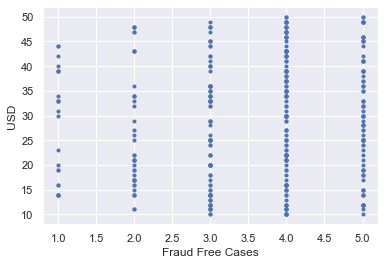

In [26]:
#Review Fraud free orders distribtion using a scatter plot

df_fraud_free = df[df['Fraud'] == False]

_ = plt.plot(df_fraud_free['No_Orders'], df_fraud_free['transactionAmount'], marker='.', linestyle='none')

_ = plt.xlabel('Fraud Free Cases')

_ = plt.ylabel('USD')

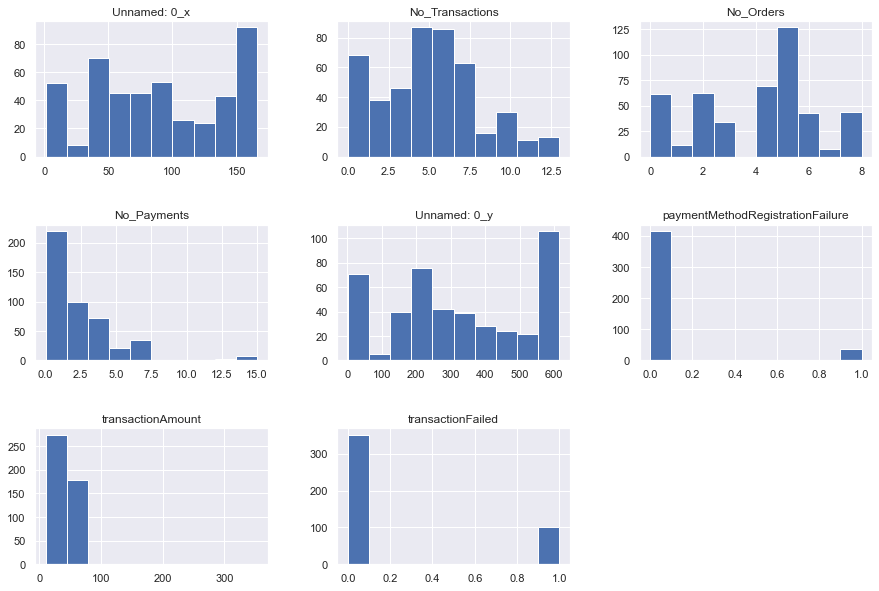

In [27]:
#Call fraud dataframe's `hist` method to plot histograms of each of the numeric features

df_fraud.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:title={'center':'transactionAmount'}, xlabel='Fraud'>

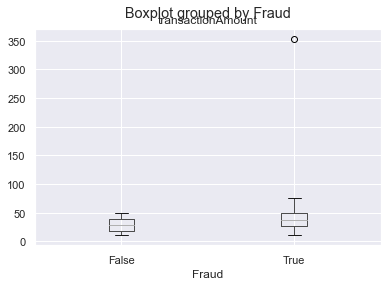

In [37]:
# Call the boxplot() method on our df.
# Set the parameters: by = 'Fraud' and column = ['No_Orders'].

df.boxplot(by='Fraud', column = ['transactionAmount'])